<a href="https://colab.research.google.com/github/r-chaudhary/Artificial-Intelligent-Repo/blob/master/N_Queen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-Queen Problem

## Eight Queen Puzzel

---


The eight queens puzzle is the problem of placing eight chess queens on an 8×8 chessboard so that no two queens threaten each other; thus, a solution requires that no two queens share the same row, column, or diagonal. The eight queens puzzle is an example of the more general n queens problem of placing n non-attacking queens on an n×n chessboard, for which solutions exist for all natural numbers n with the exception of n = 2 and n = 3.

## Eight Queen Animation


---


![Eight_Queen_Problem](https://drive.google.com/uc?export=view&id=120ppoUHiQ2Xs8LTlkUYjEMKsfbcfEqRw)

Source : [Eight_queens_puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle)

## Code

In [23]:
import chess    # Used for visualizing n-queen result

In [24]:
# A cell structure of chess board 
class cell:
    def __init__(self, name):
        self.name = name
        self.state = "free"
        self.child = []
        self.reserve = []
        self.parent = None
        self.selected = False

    def __str__(self):
        return self.name

In [25]:
class N_Queen:

    def __init__(self):
        # Creating Chess Board
        self.chess_board = self.create_board()

        # N-queen Solution
        if self.n_queen() is True:
            self.show_solution = self.display_board(self.solution)
        else:
            self.show_solution = None
            print("Solution Not Found")


    def create_board(self):
        # A chess Board of 8 x 8 cells 

        chess_board = []
        for i in range(8):
            l = []
            for j in range(8):
                l.append(cell(str([i,j])))
            chess_board.append(l)

        return chess_board


    def place_queen(self, pos, parent):
        # This method place the queen on specific positon passed by the parameter 
        # pos and block all the cells which can be threaten by queen.

        # queen position
        x = pos[0] 
        y = pos[1]

        # Modifying
        self.chess_board[x][y].state = "queen"
        self.chess_board[x][y].parent = parent
        self.chess_board[x][y].selected = True

        
        cells = []

        # This loop is the calculate all the possible cell which can be  threaten 
        # by queen.
        for i in range(1,8):
            if x-i > -1:
                if y-i > -1:
                    cells.append([x-i,y-i])
                if y+i < 8:
                    cells.append([x-i,y+i])
                cells.append([x-i,y])
        
            if x+i < 8:
                if y-i > -1:
                    cells.append([x+i,y-i])
                if y+i < 8:
                    cells.append([x+i,y+i])
                cells.append([x+i,y])

            if y-i > -1:
                cells.append([x,y-i])
            if y+i < 8:
                cells.append([x,y+i])
       
        for i in cells:
            if self.chess_board[i[0]][i[1]].state == "free":
                self.chess_board[x][y].reserve.append([i[0],i[1]])
                self.chess_board[i[0]][i[1]].state = "block"

        
        return self.chess_board[x][y]


    def remove_queen(self, pos):
        # This methods removes the queen from the specific postion and free the 
        # block cells

        x = pos[0]
        y = pos[1]

        for i in self.chess_board[x][y].reserve:
            self.chess_board[i[0]][i[1]].state = "free"
        for i in self.chess_board[x][y].child:
            self.chess_board[i[0]][i[1]].state = "free"
        
        self.chess_board[x][y].selected = False
        self.chess_board[x][y].parent = None
        self.chess_board[x][y].reserve = []
        self.chess_board[x][y].child = [] 


    def reconstruct_queen(self, cell):
        # This methods reconstructs the path to and return the solution
        # This method invokes when last queen means nth queen placed without
        # threaten any other queen. This is like a stack representation here
        # the cell appends the parent cell it reaches source and then the list
        # is solution containing n cells.
         
        sol = []
        sol.append(cell)    
        parent = self.chess_board[cell[0]][cell[1]].parent 
        sol.append(parent)

        while True:
            cell = parent
            parent = self.chess_board[cell[0]][cell[1]].parent 
            if parent == None:
                return sol
            sol.append(parent)


    def n_queen(self):
        # This method computes the n queen 
        # here it start from coord 0 , 0 of the chess board


        # start x and y
        x = 0
        y = 0
        parent = None
        current = None

        # The loop continues to run till it dosen't find the result or reaches to last cell 
        while y < 8:
            current = [x,y]
            self.place_queen(current,parent)

            depth = 0
            while depth != 7:

                found = False
                
                parent = current

                for i in range(8):
                    if parent[0]+1 >= 8:
                        self.solution = self.reconstruct_queen(parent)
                        return True

                    if self.chess_board[parent[0]+1][i].state == "free" and found == False:
                        found = True
                        current = [parent[0]+1,i]
                        self.place_queen(current,parent)
                        self.chess_board[parent[0]][parent[1]].child.append([current[0],current[1]])
                        

                if found == False:
                    curr_parent = self.chess_board[current[0]][current[1]].parent
                    self.remove_queen(current)
                    current = curr_parent
                    depth -= 2

                depth += 1        

            y += 1

        return False


    def display_board(self, result):
        # This methods visualize the solution of n-queens 
        # It uses py-chess module to do task
        
        s = [0,0,0,0,0,0,0,0]
        for i in result:
            x = i[0]
            y = i[1]
            if y-1 < 0:
                s[x] = 'q'+str(8-y-1)
            elif 8-y-1 == 0:
                s[x] = str(y)+'q'
            else:
                s[x] = str(y)+'q'+str(8-y-1)

        chess_str = "/".join(s)+" w KQkq - 3 7"
        board = chess.Board(chess_str)
        return board



## Output

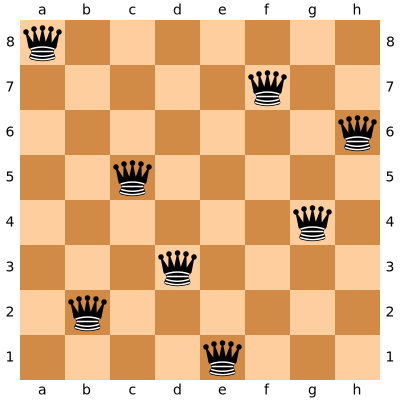

In [26]:
nqueen = N_Queen()
nqueen.show_solution